# Conceptual

## 1. Discuss the differences between LDA and QDA in terms of their main assumptions
about classes, decision boundaries, number of samples, and overfitting.

In LDA we assume that all classes are drawn from a multivariate normal distributions with a common covariance matrix
while in QDA each class has its own MND and its own covariance

In LDA the decision boundaries is linear because the common covariance matrix cuzs the quadratic terms to cancel and the discriminant is also linear which in effect cuses it to have lower variance but higher bias if the true boundary is curved 
while IN ODA since the predictors have diffrent covariance it doesnt cansle out the qoutraic terms

when it comes to sample size LDA is better with small traning sets becuse it has lower perameters
while QDA need to estmate each class-specific covariance matrix so it need more data

LDA has lower varince and higher bias as i mentioned so its less effected by overfitting 
QDA is more flexible witch mean it can bend more to the shape of the traning data leading to more over fitting 

## Regarding KNN
### (a) How does the choice of distance metric affect the performance of k-NN classification?
KNN picks the k training points that are “closest” to the query x and lets them vote.
Because “closest” is defined entirely by the distance metric, changing that metric literally changes who is allowed to vote

### (b) Please also discuss the concept of the curse of dimensionality and its implications for k-NN
algorithm.
non-parametric models like k-NN need a number of datapoints that grows exponentially with *p*
In high dimensions almost every point is far from every other; volumes of hyper-balls explode so quickly that to keep the same local coverage radius you must include a huge fraction of the space. so the training set becomes so sparse that the “nearest” neighbors are still far away and increasingly irrelevant



# Practical
Overview of the steps
1. Load the data and get an overview of the data
2. Perform a logistic regression
3. Use the logistic regression models
4. Perform an LDA
5. Use the LDA regression model
6. Perform an QDA
7. Use the QDA regression model
8. Use 𝑘-Nearest Neighbors (KNN)

## Steps in detail
Load the data and get an overview of the data
Load the data file Smarket.csv .
This data set consists of percentage returns for a stock index over 1250 days. 
For each date, it contains the percentage returns for each of the five previous trading days, Lag1 through
Lag5 .
It also contains Volume (the number of shares traded on the previous day, in billions), Today (the percentage return on the date in question) and Direction (whether the market was Up or Down on this date).

In [1]:
import pandas as pd
df = pd.read_csv("dataset/Smarket.csv", index_col=0)

Display the number of predictors and possible responses and their names:


In [2]:
print(df.shape[1])
print(df.columns.tolist())

9
['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction']


Print a statistic summary of the predictors and responses:

In [6]:
print(df.describe(include='all'))

               Year         Lag1         Lag2         Lag3         Lag4  \
count   1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean    2003.016000     0.003834     0.003919     0.001716     0.001636   
std        1.409018     1.136299     1.136280     1.138703     1.138774   
min     2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25%     2002.000000    -0.639500    -0.639500    -0.640000    -0.640000   
50%     2003.000000     0.039000     0.039000     0.038500     0.038500   
75%     2004.000000     0.596750     0.596750     0.596750     0.596750   
max     2005.000000     5.733000     5.733000     5.733000     5.733000   

              Lag5       Volume        Today Direction  
count   1250.00000  1250.000000  1250.0000

Display the number of data points:


In [4]:
print(df.shape[0])

1250


Display the data in a table (subset of rows is sufficient):


In [5]:
print(df.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
1  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
2  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
3  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
4  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
5  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up


Correlation Matrix:
         Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today
Year    1.000  0.030  0.031  0.033  0.036  0.030   0.539  0.030
Lag1    0.030  1.000 -0.026 -0.011 -0.003 -0.006   0.041 -0.026
Lag2    0.031 -0.026  1.000 -0.026 -0.011 -0.004  -0.043 -0.010
Lag3    0.033 -0.011 -0.026  1.000 -0.024 -0.019  -0.042 -0.002
Lag4    0.036 -0.003 -0.011 -0.024  1.000 -0.027  -0.048 -0.007
Lag5    0.030 -0.006 -0.004 -0.019 -0.027  1.000  -0.022 -0.035
Volume  0.539  0.041 -0.043 -0.042 -0.048 -0.022   1.000  0.015
Today   0.030 -0.026 -0.010 -0.002 -0.007 -0.035   0.015  1.000

P-Values Matrix:
         Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today
Year    0.000  0.294  0.280  0.241  0.207  0.293   0.000  0.288
Lag1    0.294  0.000  0.353  0.703  0.916  0.841   0.148  0.356
Lag2    0.280  0.353  0.000  0.360  0.701  0.900   0.125  0.717
Lag3    0.241  0.703  0.360  0.000  0.396  0.506   0.139  0.931
Lag4    0.207  0.916  0.701  0.396  0.000  0.339   0.087  0.807
La

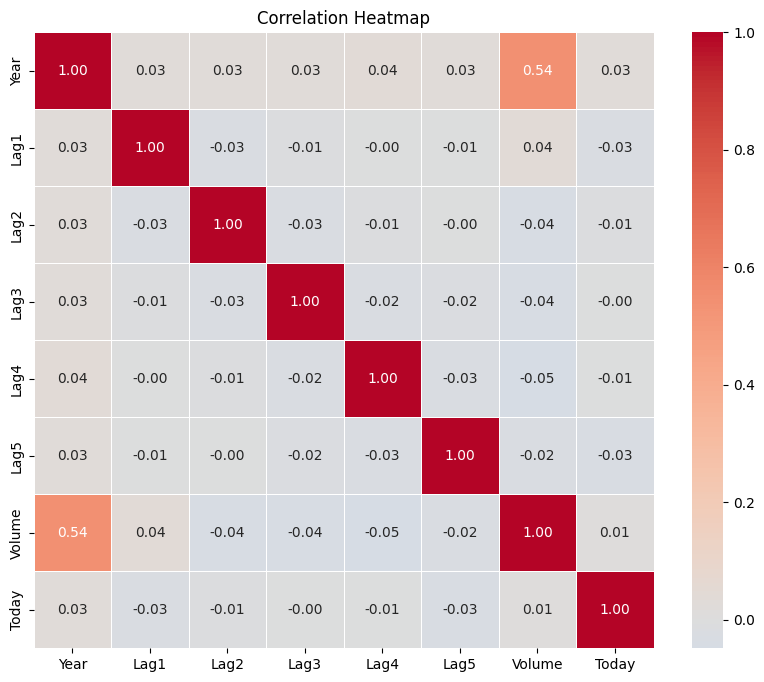

In [11]:
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop categorical column 'Direction'
numeric_df = df.drop(columns=['Direction'])

# Correlation matrix
cor_matrix = numeric_df.corr()

# Compute p-values
pvals = pd.DataFrame(np.ones(cor_matrix.shape), columns=cor_matrix.columns, index=cor_matrix.index)
for col1 in numeric_df.columns:
    for col2 in numeric_df.columns:
        if col1 != col2:
            _, pval = pearsonr(numeric_df[col1], numeric_df[col2])
            pvals.loc[col1, col2] = pval
        else:
            pvals.loc[col1, col2] = 0  # p-value for correlation with itself
print("Correlation Matrix:")
print(cor_matrix.round(3))

print("\nP-Values Matrix:")
print(pvals.round(3))

plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



### **Interpretation of Correlation Strengths**
Most of the correlations are **very close to 0**, indicating **very weak or no linear relationship** between the variables. exept between `Year` and `Volume` (`0.539`), suggesting that **volume increased over time**

### **P-values (Statistical Significance)**
The only strongly **statistically significant correlation** is: `Year` and `Volume` (p ≈ 0.000), consistent with the `r = 0.54` correlation.



## Plot the correlated predictors Volume and Year

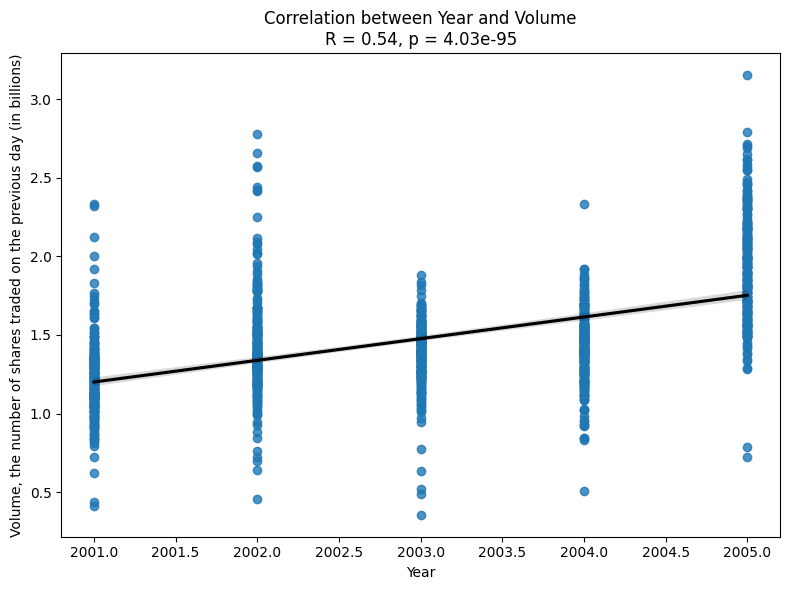

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Compute Pearson correlation
r, p = pearsonr(df['Year'], df['Volume'])

# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Year', y='Volume', data=df, ci=95, line_kws={'color': 'black'})

# Annotate the correlation coefficient and p-value
plt.title(f"Correlation between Year and Volume\nR = {r:.2f}, p = {p:.2e}")
plt.xlabel("Year")
plt.ylabel("Volume, the number of shares traded on the previous day (in billions)")
plt.tight_layout()
plt.show()




### **Interpretation of the Scatter Plot: Year vs. Volume**

* Their is **positive linear trend** between `Year` and `Volume`,meaning that the volume of shares traded has generally **increased over time**.
* The Pearson correlation coefficient `R = 0.54` indicates a **moderate positive correlation**. in other words while the relationship is not extremely strong, it is still meaningful.
* The p-value `p = 4.03e-95` is **extremely small**, far below the common threshold (0.05), whitch makes the correlation **statistically significant**
* Vertical show that for each individual year, there is **high variation in volume** but the regration is showing the avrage increasing

## Perform logistic regressions
Fit a logistic regression model in order to predict Direction using Lag1 through Lag5
and Volume .


In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit logistic regression model using statsmodels
logit_model = smf.glm(formula="Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume",
                      data=df,
                      family=sm.families.Binomial()).fit()

# Display coefficients summary
print(logit_model.summary())


                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    Logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Sun, 11 May 2025   Deviance:                       1727.6
Time:                                          15:15:35   Pearson chi2:                 1.25e+03
No. Iterations:                                       4   Pseudo R-squ. (CS):           0.002868
Covariance Type:                              nonrobust                                         
                 coef    std e




### **Interpretion**
* the Intercept `0.1260` means: if all inputs (Lag1–Lag5 and Volume) are zero, the base log-odds of the market going up is 0.126
* `Lag1`: **+0.0731** → A higher return 1 day ago slightly **increases the chance** of the market going Up.
* `Lag2`: **+0.0423** → Same idea, but effect is even smaller.
* `Lag3`, `Lag4`, `Lag5`: All near 0 and negative → Little to no impact.
* `Volume`: **-0.1354** → Higher volume is (weakly) associated with a **decrease** in the chance of the market going Up.
* **All p-values > 0.1** ➜ means: None of these predictors (Lag1–Lag5 or Volume) are **statistically significant**.
* `Pseudo R-squ. (CS): 0.002868` → Very low. This model explains **only about 0.3% of the variation**.

In short, these inputs don't help us predict market movements very well in this simple logistic model.



## Use the logistic regression models

Predict the probability that the market will go up, given values of the predictors.


In [14]:
# Predict probabilities that Direction == "Up"
glm_probs = logit_model.predict()

# Show first 10 predicted probabilities
print(glm_probs[:10])

[0.49291587 0.51853212 0.51886117 0.48477764 0.48921884 0.49304354
 0.50734913 0.49077084 0.48238647 0.51116222]


These values correspond to the probability of the market going up rather than down.


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

# ------------------------------------------------------------------
# 1. Contrast matrix: how the response is dummy–coded (like R's contrasts)
# ------------------------------------------------------------------
contrast = pd.DataFrame({'Up': [0, 1]}, index=['Down', 'Up'])
print("Contrast Matrix (dummy-coding of Direction):\n")
print(contrast, "\n")

glm_pred = np.where(glm_probs > 0.5, "Down", "Up") 

# ------------------------------------------------------------------
# 3. Confusion matrix in the book’s orientation
#    rows  = predicted
#    cols  = actual
# ------------------------------------------------------------------
cm = confusion_matrix(glm_pred, df["Direction"], 
                      labels=["Down", "Up"])

cm_df = pd.DataFrame(cm,
                     index   = ["Predicted Down", "Predicted Up"],
                     columns = ["Actual Down",   "Actual Up"])

print("Confusion Matrix (book layout):\n")
print(cm_df, "\n")

# ------------------------------------------------------------------
# 4. Overall accuracy
# ------------------------------------------------------------------
accuracy = accuracy_score(df["Direction"], glm_pred)
print("Accuracy:", round(accuracy, 4))


Contrast Matrix (dummy-coding of Direction):

      Up
Down   0
Up     1 

Confusion Matrix (book layout):

                Actual Down  Actual Up
Predicted Down          145        141
Predicted Up            457        507 

Accuracy: 0.5216




### **Interpretation of the Predictions and Confusion Matrix**

* **Predicted Probabilities** All **very close to 0.5**, which means the model is **very uncertain** — it has **no strong confidence** in predicting either “Up” or “Down”



* with that in mind here is the **Confusion matrix**

  * **145** Down days were correctly labelled **Down**.
  * **507** Up days were correctly labelled **Up**.
  * **141** Up days were **missed** (predicted Down).
  * **457** Down days were **missed** (predicted Up).

* yes it has 52 acrucy that is better than random gussing but its still bad



### Recall the low 𝑝 values of the predictors. Check if a subset of predictors gives better results

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score


logit_model_lag12 = smf.glm(
    formula="Direction ~ Lag1 + Lag2",
    data=df,
    family=sm.families.Binomial()
).fit()

glm_probs_lag12 = logit_model_lag12.predict()

glm_pred_lag12 = np.where(glm_probs_lag12 > 0.5, "Down", "Up")

cm = confusion_matrix(glm_pred_lag12,
                      df["Direction"],
                      labels=["Down", "Up"])

cm_df = pd.DataFrame(cm,
                     index   = ["Predicted Down", "Predicted Up"],
                     columns = ["Actual Down",   "Actual Up"])

print("Confusion Matrix:\n")
print(cm_df, "\n")

accuracy = accuracy_score(df["Direction"], glm_pred_lag12)
print("Accuracy:", round(accuracy, 4))


Confusion Matrix:

                Actual Down  Actual Up
Predicted Down          114        102
Predicted Up            488        546 

Accuracy: 0.528


Using only the returns from the previous one and two days gives a model that correctly calls the market about 53 % of the time. It does a good job when the market actually rises, but it misses four-fifths of the down days. In short, Lag 1 and Lag 2 add a sliver of predictive value, but the model is still too weak and heavily skewed toward forecasting an ‘Up’ market.

## Perform an LDA
Now perform an LDA on the Smarket data and analyze the result


Call:  LDA(Direction ~ Lag1 + Lag2)

Prior probabilities of groups:
 Down    0.4816
Up      0.5184
Name: Prior Prob., dtype: float64 

Group means:
           Lag1      Lag2
Down  0.050686  0.032297
Up   -0.039691 -0.022444 

Coefficients of linear discriminant:
 Lag1   -0.071261
Lag2   -0.044332
Name: LD1 coef, dtype: float64 



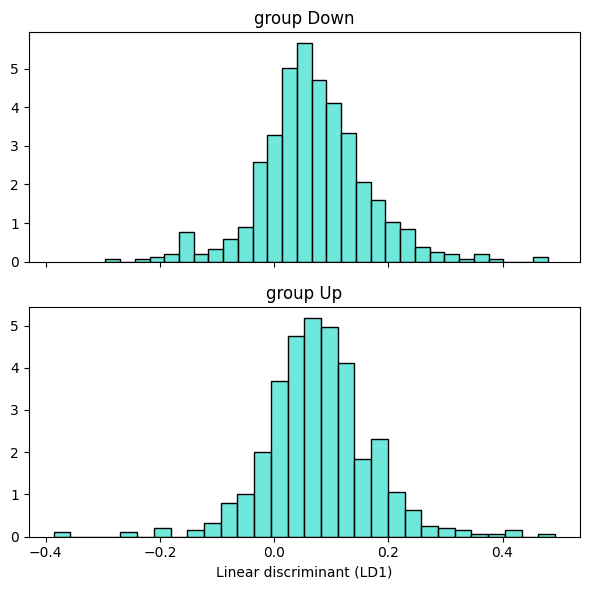

In [32]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X = df[["Lag1", "Lag2"]]
y = df["Direction"]

lda = LDA()
lda.fit(X, y)

print("Call:  LDA(Direction ~ Lag1 + Lag2)\n")


priors = pd.Series(lda.priors_, index=lda.classes_, name="Prior Prob.")
print("Prior probabilities of groups:\n", priors, "\n")


means = pd.DataFrame(lda.means_, index=lda.classes_, columns=["Lag1", "Lag2"])
print("Group means:\n", means, "\n")

coef = pd.Series(lda.coef_[0], index=["Lag1", "Lag2"], name="LD1 coef")
print("Coefficients of linear discriminant:\n", coef, "\n")


lda_scores = lda.decision_function(X)
score_df   = pd.DataFrame({"LD1": lda_scores, "Direction": y})

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(6, 6))
for (cls, ax) in zip(lda.classes_, axes):
    sns.histplot(
        score_df[score_df["Direction"] == cls]["LD1"],
        bins=30, stat="density", color="turquoise",
        edgecolor="black", ax=ax
    )
    ax.set_ylabel("")          # cleaner look
    ax.set_title(f"group {cls}", loc="center")
plt.xlabel("Linear discriminant (LD1)")
plt.tight_layout()
plt.show()



### **Linear Discriminant Analysis (LDA) on `Lag1` and `Lag2`**

* **Prior probabilities** Down ≈ 48 %, Up ≈ 52 %, Merely the class proportions in the whole data set; LDA uses them as baseline odds.
* **Group means** it tells us that in days that ends down the market been slightly up over the last 2 days and viceversa
* **LD1 coefficients** since their both nagative it have the same impact of the group mean
* **Separation is weak:** the overlap in the LD1 histograms shows most days sit near the decision boundary, so classification will often be uncertain.



## Use the LDA model
Predict the Direction as a response for the selected predictor values using the trained LDA
model.


In [33]:

lda_pred_class = lda.predict(X)  # Already defined earlier as: X = df[["Lag1", "Lag2"]]

# Actual labels
true_labels = df["Direction"]

# Confusion matrix: rows = predicted, columns = actual (book layout)
cm = confusion_matrix(lda_pred_class, true_labels, labels=["Down", "Up"])
cm_df = pd.DataFrame(cm,
                     index=["Predicted Down", "Predicted Up"],
                     columns=["Actual Down", "Actual Up"])

print("Confusion Matrix (LDA):\n")
print(cm_df, "\n")

# Accuracy
accuracy = accuracy_score(true_labels, lda_pred_class)
print("Accuracy:", round(accuracy, 4))


Confusion Matrix (LDA):

                Actual Down  Actual Up
Predicted Down          114        102
Predicted Up            488        546 

Accuracy: 0.528


LDA and logistic regression give nearly identical predictions when based on the same two predictors, indicating both models are seeing the same weak signal in the data.

## Perform a QDA
Now perform a QDA on the Smarket data and analyze the result

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# Features and target
X = df[["Lag1", "Lag2"]]
y = df["Direction"]

# 1. Fit the QDA model
qda = QDA()
qda.fit(X, y)

# 2. Print summary info similar to R output
print("Call: QDA(Direction ~ Lag1 + Lag2)\n")

# Prior probabilities of groups
priors = pd.Series(qda.priors_, index=qda.classes_, name="Prior Prob.")
print("Prior probabilities of groups:\n", priors, "\n")

# Group means
means = pd.DataFrame(qda.means_, index=qda.classes_, columns=["Lag1", "Lag2"])
print("Group means:\n", means, "\n")


Call: QDA(Direction ~ Lag1 + Lag2)

Prior probabilities of groups:
 Down    0.4816
Up      0.5184
Name: Prior Prob., dtype: float64 

Group means:
           Lag1      Lag2
Down  0.050686  0.032297
Up   -0.039691 -0.022444 



The QDA model, like the previous logistic and LDA models, detects a very weak inverse relationship: on average, the market tends to reverse direction after two days of movement. However, the group means show that the differences are small, so we shouldn’t expect highly accurate predictions.

### Use the QDA model
Predict the Direction as a response for the selected predictor values using the trained QDA
model. Compute and analyze a confusion matrix.


In [39]:

# Predict class labels
qda_pred = qda.predict(X)

cm_df = pd.DataFrame(cm,
                     index=["Predicted Down", "Predicted Up"],
                     columns=["Actual Down", "Actual Up"])

print("Confusion Matrix (QDA):\n")
print(cm_df, "\n")

# Accuracy
accuracy = accuracy_score(y, qda_pred)
print("Accuracy:", round(accuracy, 4))



Confusion Matrix (QDA):

                Actual Down  Actual Up
Predicted Down          109         94
Predicted Up            493        554 

Accuracy: 0.5304


The QDA model does slightly better than the previous models, reaching 53% accuracy. Like the others, it heavily favors predicting 'Up', correctly classifying most Up days but missing most Down days. The result confirms that Lag1 and Lag2 contain only weak predictive power, even when using a more flexible quadratic model.

## Use 𝐾-Nearest Neighbors Clustering
Create a training data set used to fined the k nearest neighbors of a data point and their actual
classes.

In [40]:
# Train on years before 2005, test on 2005
train_mask = df["Year"] < 2005
df_train = df[train_mask]
df_test = df[~train_mask]

print(df_test.shape)  # should show (252, 9)


(252, 9)


In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Use Lag1 and Lag2 as features
X_train = df_train[["Lag1", "Lag2"]].values
X_test = df_test[["Lag1", "Lag2"]].values

# Direction labels
y_train = df_train["Direction"].values
y_test = df_test["Direction"].values


In [43]:

# KNN with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Confusion matrix (rows: predicted, columns: actual)
cm = confusion_matrix(knn_pred, y_test, labels=["Down", "Up"])
print("Confusion Matrix (K=1):")
print(pd.DataFrame(cm, index=["Predicted Down", "Predicted Up"],
                   columns=["Actual Down", "Actual Up"]))

# Accuracy
print("\nAccuracy:", round(accuracy_score(y_test, knn_pred), 4))


Confusion Matrix (K=1):
                Actual Down  Actual Up
Predicted Down           43         58
Predicted Up             68         83

Accuracy: 0.5


In [45]:
# KNN with k=1
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Confusion matrix (rows: predicted, columns: actual)
cm = confusion_matrix(knn_pred, y_test, labels=["Down", "Up"])
print("Confusion Matrix (K=3):")
print(pd.DataFrame(cm, index=["Predicted Down", "Predicted Up"],
                   columns=["Actual Down", "Actual Up"]))

# Accuracy
print("\nAccuracy:", round(accuracy_score(y_test, knn_pred), 4))


Confusion Matrix (K=3):
                Actual Down  Actual Up
Predicted Down           48         55
Predicted Up             63         86

Accuracy: 0.5317


KNN with k=1 performs no better than flipping a coin on the 2005 data. Increasing k to 3 smooths the predictions and leads to better performance, achieving 53.2% accuracy. This makes k=3 slightly better than logistic regression, LDA, and QDA using the same features. However, even with this improvement, the predictive power of Lag1 and Lag2 remains weak.